Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

Откуда брать данные?

Можете взять свои рабочие данные, либо найти открытые данные (например, на kaggle.com) по интересующей вас предметной области (тогда не забудьте их выложить на github вместе с ноутбуком).

Из первого графика можно сделать вывод, что самым популярным артистом 2019 года стал Ed Sheeran
Из второго графика можно сделать вывод, что самой популярной песней 2019 года стала bad guy
Из третьего графика можно сделать вывод, что популярность слабо зависит от танцевальности
Из четвертого графика можно сделать вывод, что самыми популярными жанрами среди артистов оказались dance pop и pop


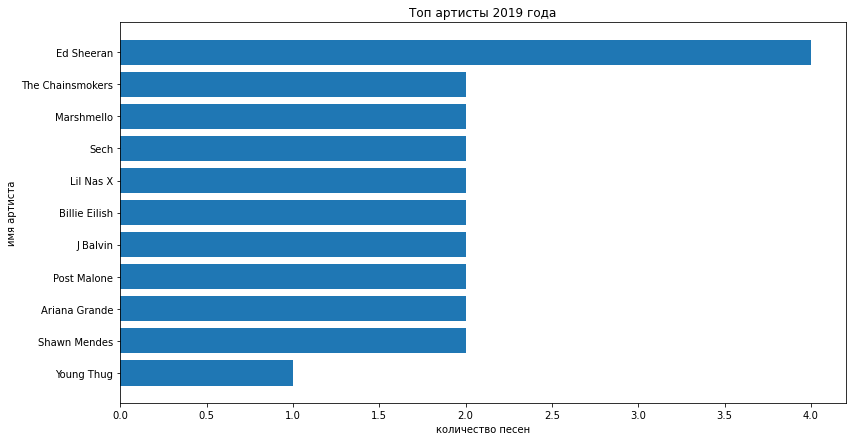

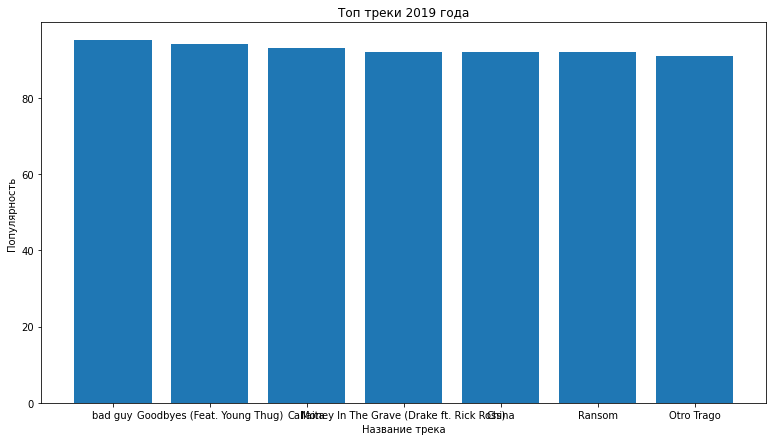

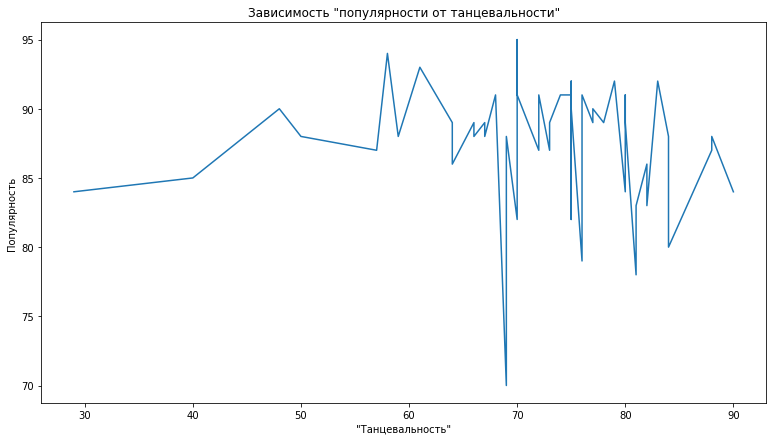

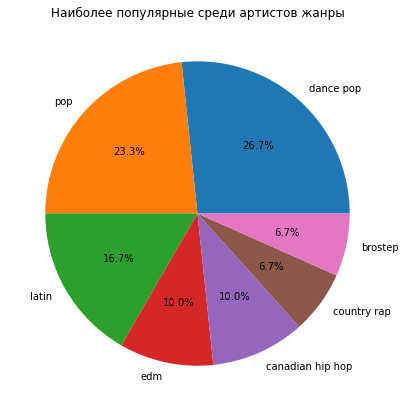

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

top_songs_ds = pd.read_csv('top50.csv', encoding='latin-1')

top_stars_fig = plt.figure(figsize=(13, 7))
top_stars = top_stars_fig.add_subplot()
top_stars.set_xlabel('количество песен')
top_stars.set_ylabel('имя артиста')
top_stars.set_title('Топ артисты 2019 года')
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 1000)

artists_freq = dict(top_songs_ds['Artist.Name'].value_counts())
names = list(artists_freq.keys())[:11]
names.reverse()
count_freq = list(artists_freq.values())[:11]
count_freq.reverse()
top_stars.barh(names, count_freq)
print('Из первого графика можно сделать вывод, что самым популярным артистом 2019 года стал', names[-1])


top_songs_fig = plt.figure(figsize=(13, 7))
top_songs = top_songs_fig.add_subplot()
top_songs.set_xlabel('Название трека')
top_songs.set_ylabel('Популярность')
top_songs.set_title('Топ треки 2019 года')
tracks_by_popularity = top_songs_ds[['Artist.Name', 'Track.Name', 'Popularity']].sort_values('Popularity',
                                                                                             ascending=False).head(7)
top_songs.bar(tracks_by_popularity['Track.Name'], tracks_by_popularity['Popularity'])
print('Из второго графика можно сделать вывод, что самой популярной песней 2019 года стала',
      tracks_by_popularity['Track.Name'].values[0])

danceability_fig = plt.figure(figsize=(13, 7))
danceability_af_popularity = danceability_fig.add_subplot()
danceability_af_popularity.set_xlabel('"Танцевальность"')
danceability_af_popularity.set_ylabel('Популярность')
danceability_af_popularity.set_title('Зависимость "популярности от танцевальности"')

danceability_and_popularity = top_songs_ds[['Danceability', 'Popularity']].sort_values('Danceability')
danceability_af_popularity.plot(list(danceability_and_popularity['Danceability'].values),
                                list(danceability_and_popularity['Popularity'].values))
print('Из третьего графика можно сделать вывод, что популярность слабо зависит от танцевальности')


genres_pie = plt.figure(figsize=(13, 7))
genres_ax = genres_pie.add_subplot()
genres_ax.set_title('Наиболее популярные среди артистов жанры')
genres = dict(top_songs_ds['Genre'].value_counts())

genres_ax.pie(list(genres.values())[:7], autopct='%1.1f%%',  labels=list(genres.keys())[:7])

print('Из четвертого графика можно сделать вывод, что самыми популярными жанрами среди артистов оказались',
      list(genres.keys())[0], 'и', list(genres.keys())[1])


plt.show()